<a href="https://colab.research.google.com/github/xxchanjotxx/Medical-Analysis/blob/main/Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import calendar
from scipy.stats import linregress



%matplotlib inline

In [2]:
df = pd.read_csv("medical_examination.csv")
# df.set_index("id", inplace = True)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df["age"] = round(df["age"]/365,0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# df["overweight"] = (df["weight"] / ((df["height"]/100) ** 2)).apply(lambda x: 1 if)
BMI = (df["weight"] / ((df["height"]/100)**2))
df["overweight"] = BMI.apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1
#  , make the value 0. If the value is more than 1, make the value 1.
# Convert the data into long format and create a chart that shows the value counts of the categorical
# features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for
#  each cardio value. The chart should look like examples/Figure_1.png.


df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x==1 else 1)
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)
df.head(15)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50.0,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,55.0,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,52.0,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,48.0,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,48.0,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,60.0,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,61.0,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,62.0,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,48.0,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,54.0,1,164,68.0,110,60,0,0,0,0,0,0,1


In [6]:
df.drop(df[df["height"] < df["height"].quantile(0.025)].index, inplace = True)
df.shape[0]

68463

In [7]:
df.drop(df[df["height"] > df["height"].quantile(0.975)].index, inplace = True)

In [8]:
df.drop(df[df["ap_lo"]>df["ap_hi"]].index, inplace = True)
df.shape[0]

65859

In [9]:
df.drop(df[df["weight"] < df["weight"].quantile(0.025)].index, inplace = True)
df.drop(df[df["weight"] > df["weight"].quantile(0.975)].index, inplace = True)



<Axes: >

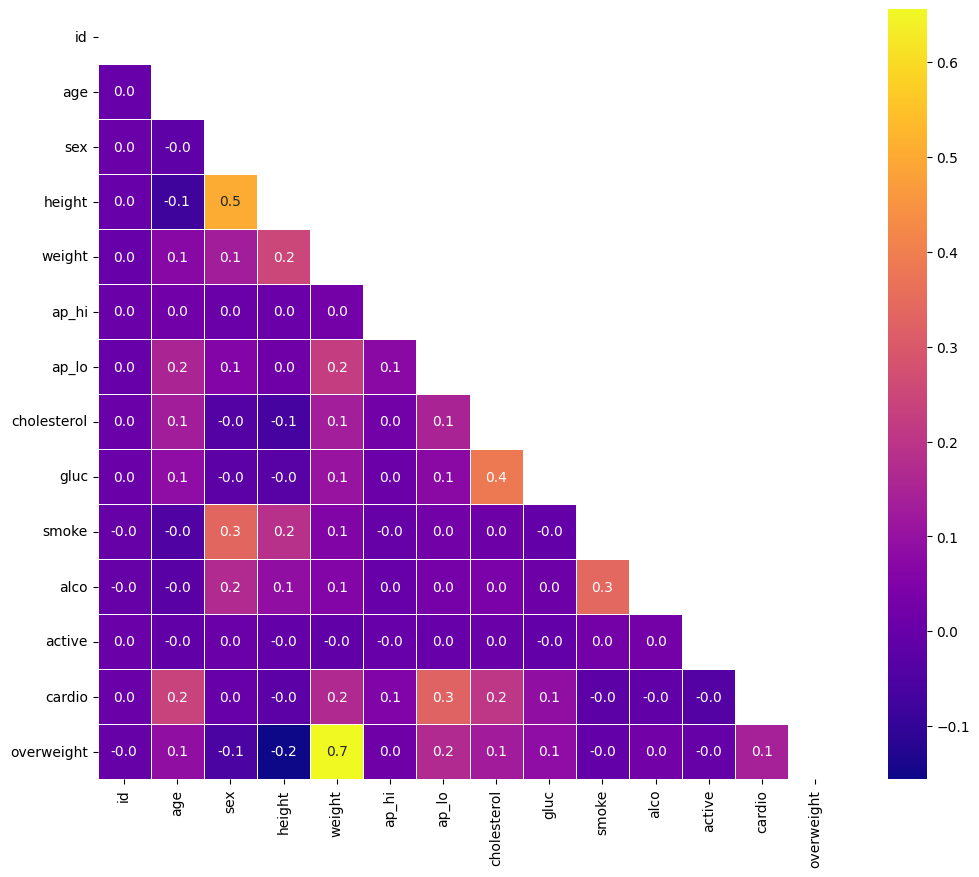

In [14]:
correlation_matrix = df.corr()
correlation_matrix
fig, ax = plt.subplots(figsize = (12,10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,mask = mask, annot = True, fmt = ".1f", linewidth =.5, cmap = "plasma")

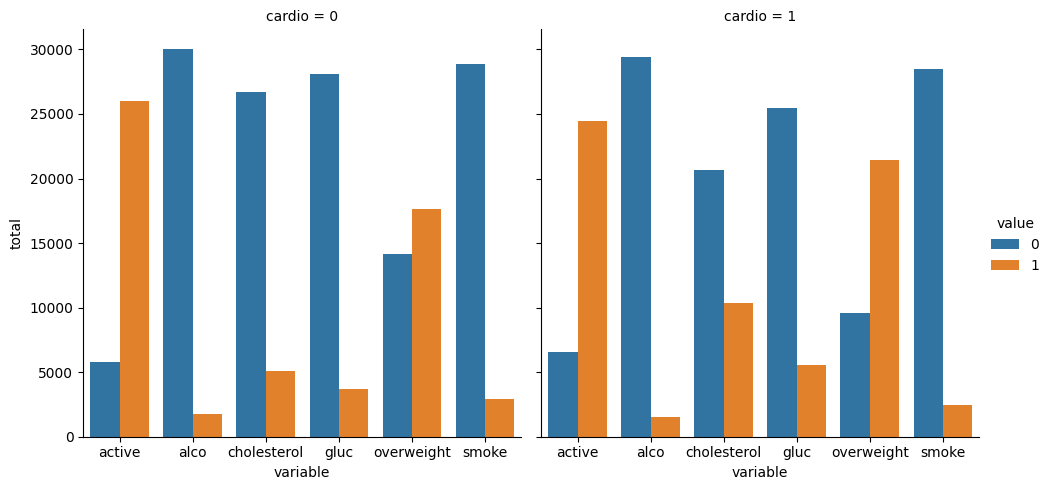

In [16]:
df_cat = df.melt(id_vars = ["cardio"], value_vars = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
df_cat = df_cat.value_counts().sort_index().reset_index()
df_cat.columns = ["cardio", "variable", "value", "total"]
sns.catplot(x = "variable", y = "total", data = df_cat, kind = "bar", col = "cardio", hue = "value")